In [1]:
#Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame

In [3]:
def load_data(data_path):
    data_set = np.genfromtxt(data_path, delimiter=',')
    return data_set

In [4]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size " + str(4))


In [5]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    #set number of nodes in hiden layer
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [6]:
def sigmoid(z):
    return 1 / ( 1+ np.exp(-z))

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    
    #Create Random parameters
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    #Save parameters in dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def forward_propagation(X, parameters):
    
    
    #retrieve parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Compute value
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
   

    #save value in dictionary
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [9]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1]
    
    #Compute Cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = - (1/m) * np.sum(logprobs)
    
    #convert to number. Example: [[1]] --> 1
    cost = float(np.squeeze(cost))
    
    return cost

In [10]:

def backward_propagation(parameters, cache, X, Y):
  
    m = X.shape[1]
    
    #retrieve weights
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    #retrieve value 
    A1 = cache['A1']
    A2 = cache['A2']
    
    #dZ2
    dZ2 = A2 - Y
    
    #dW2 = dZ2 x A1 
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    
    #db2 = dZ2
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    
    #dZ1 = W[2].T x dZ2 * g[1]'(z1) 
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    
    #dZ1 x X 
    dW1 = (1/m)*np.dot(dZ1, X.T)
    
    
    db1 =  (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [11]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    costs = []
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    
    for i in range(0, num_iterations):
         
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
        
        costs.append(cost)

    return parameters, costs

In [13]:
def predict(parameters, X):
   
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Shape of input X: (2, 400)
Shape of label Y: (1, 400)


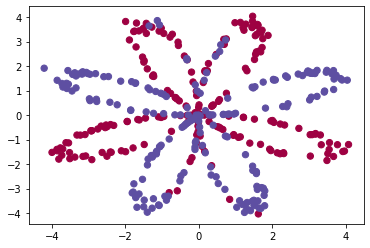

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


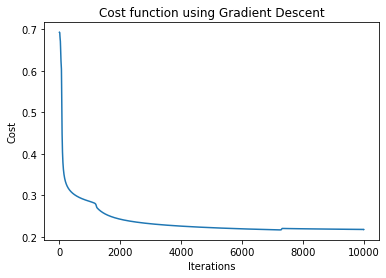

Predict with input (2,1), result: True
Predict with input (4,-2), result: False


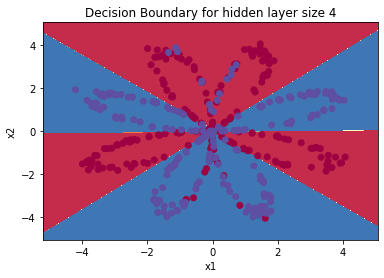

In [14]:
if __name__ == "__main__":
    
    
    #load flower dataset
    data_path = 'data4.csv'
    data_set = load_data(data_path)    
    
    #Create a random dataset
    m = data_set.shape[1]
    X = data_set[0:2, :]
    Y = data_set[2,:].reshape((1,m))
    
    #print shape of data
    print("Shape of input X:",X.shape)
    print("Shape of label Y:",Y.shape)
    
    
    # scatter plot, dots colored by class value
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
    plt.show()
    
       
    #Get network size
    n_x, n_h, n_y = layer_sizes(X, Y)
    print("The size of the input layer is: n_x = " + str(n_x))
    print("The size of the hidden layer is: n_h = " + str(n_h))
    print("The size of the output layer is: n_y = " + str(n_y))
    
    
    #train network
    parameters, costs = nn_model(X, Y, n_h, 10000, True)
    
    #plot cost 
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost function using Gradient Descent")
    plt.show()
    
    
    #plot decision boundary
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
  

    #predict 
    x = np.array([[4],[1]])
    print("Predict with input (2,1), result:", predict(parameters, x)[0][0])
    x = np.array([[4],[-2]])
    print("Predict with input (4,-2), result:", predict(parameters, x)[0][0])
    
    
    

    